# Recommend a best book based on the ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from scipy import sparse

In [15]:
book = pd.read_csv('book_rec_sys.csv', encoding='latin-1') 
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [7]:
book.rename(columns={'Unnamed: 0':'ID'}, inplace=True )

In [8]:
book.rename(columns={'Book.Title':'Title'}, inplace = True)

In [9]:
book.rename(columns={'User.ID':'User'}, inplace = True)

In [10]:
book.rename(columns={'Book.Rating':'Rating'}, inplace = True)

In [16]:
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [17]:
book.tail()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [18]:
book.shape

(10000, 4)

In [20]:
book.groupby('Book.Title').mean().head()

,Unnamed: 0,User.ID,Book.Rating
Book.Title,,,
"Jason, Madison &amp",4905.0,2106.0,8.0
Other Stories;Merril;1985;McClelland &amp,4907.0,2106.0,6.0
Repairing PC Drives &amp,4906.0,2106.0,4.0
'48,4405.0,1805.0,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,9231.0,161737.0,8.0


In [27]:
print(book["Book.Title"].isnull().sum() )
print(book["Book.Rating"].isnull().sum() )

0
0


In [ ]:
n_users = book['User'].nunique()
n_books = book['Title'].nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Books: '+str(n_books))

In [28]:
book.groupby('Book.Rating').mean()

,Unnamed: 0,User.ID
Book.Rating,,
1,5523.209302,82598.906977
2,4911.476190,122724.746032
3,4758.897260,110713.438356
4,4914.270042,114933.189873
5,4891.099305,109836.636544
6,5042.135870,94575.890217
7,5170.971580,86765.114644
8,4939.773982,99391.067893
9,4891.517749,95875.471534


In [29]:
book.groupby('Book.Title')['Book.Rating'].mean().sort_values(ascending=False).head()

Book.Title
Clear Light of Day                                         10.0
Substitute Teaching: A Handbook for Hassle-Free Subbing    10.0
Daughter of Camelot (Merlin's Legacy, No 6)                10.0
The Resourceful English Teacher                            10.0
Das verbotene Lied.                                        10.0
Name: Book.Rating, dtype: float64

In [30]:
book.groupby('Book.Title')['Book.Rating'].count().sort_values(ascending=False).head()

Book.Title
Fahrenheit 451                                     5
Vanished                                           4
Charlie and the Chocolate Factory                  4
Stardust                                           4
The Amber Spyglass (His Dark Materials, Book 3)    4
Name: Book.Rating, dtype: int64

In [31]:
ratings = pd.DataFrame(book.groupby('Book.Title')['Book.Rating'].mean())
ratings.head()

,Book.Rating
Book.Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [32]:
ratings['num of ratings'] = pd.DataFrame(book.groupby('Book.Title')['Book.Rating'].count())
ratings

,Book.Rating,num of ratings
Book.Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0,1
"\Well, there's your problem\: Cartoons",9.0,1
iI Paradiso Degli Orchi,7.0,1


<AxesSubplot:>

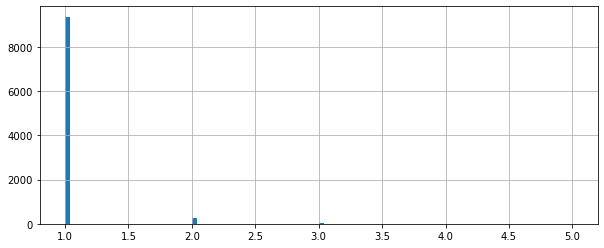

In [33]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=100)

<AxesSubplot:>

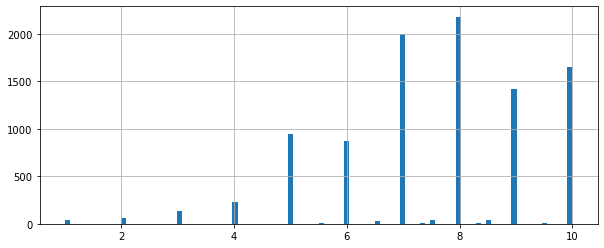

In [35]:
plt.figure(figsize=(10,4))
ratings['Book.Rating'].hist(bins=100)

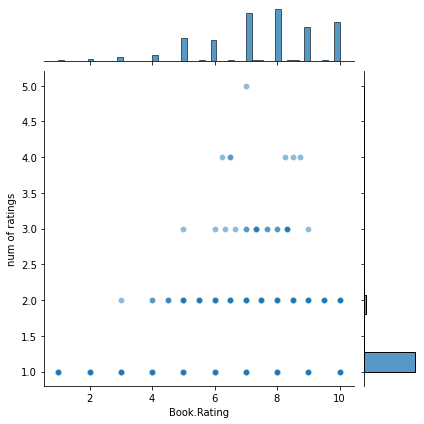

In [36]:
sns.jointplot(x='Book.Rating',y='num of ratings',data=ratings,alpha=0.5)

In [37]:
tfid = TfidfVectorizer(stop_words="english")
tfid_matrix = tfid.fit_transform(book['Book.Title'])
tfid_matrix.shape

(10000, 11435)

In [38]:
print(tfid_matrix)

  (0, 6968)	0.6798989461050784
  (0, 2262)	0.733305818254024
  (1, 1816)	0.7071067811865476
  (1, 2252)	0.7071067811865476
  (2, 7166)	0.6625534369282937
  (2, 2933)	0.749014648197554
  (3, 1996)	0.37362521359059986
  (3, 10886)	0.37362521359059986
  (3, 9021)	0.2813160805754238
  (3, 114)	0.35770766385737696
  (3, 7472)	0.37362521359059986
  (3, 5322)	0.37362521359059986
  (3, 4613)	0.23030946840620475
  (3, 9756)	0.2046583436772717
  (3, 4139)	0.37362521359059986
  (4, 10725)	0.7071067811865476
  (4, 6925)	0.7071067811865476
  (5, 11133)	0.5741118863839041
  (5, 4529)	0.5301064251194945
  (5, 5774)	0.6240053845598971
  (6, 5246)	0.4702119328617262
  (6, 5006)	0.4911357837677152
  (6, 6677)	0.4702119328617262
  (6, 4187)	0.4911357837677152
  (6, 11266)	0.27454099911420016
  :	:
  (9993, 7493)	0.7043514860336613
  (9994, 9700)	0.4171831630623902
  (9994, 11276)	0.37701826971292507
  (9994, 10486)	0.39940991461887054
  (9994, 11295)	0.3162511319165422
  (9994, 6108)	0.34663470081473363


In [39]:
print(tfid.vocabulary_)

{'classical': 2262, 'mythology': 6968, 'clara': 2252, 'callan': 1816, 'decision': 2933, 'normandy': 7166, 'flu': 4139, 'story': 9756, 'great': 4613, 'influenza': 5322, 'pandemic': 7472, '1918': 114, 'search': 9021, 'virus': 10886, 'caused': 1996, 'mummies': 6925, 'urumchi': 10725, 'kitchen': 5774, 'god': 4529, 'wife': 11133, 'world': 11266, 'foremost': 4187, 'military': 6677, 'historians': 5006, 'imagine': 5246, 'pleading': 7844, 'guilty': 4698, 'black': 1425, 'flag': 4095, 'romance': 8685, 'reality': 8350, 'life': 6054, 'pirates': 7793, 'll': 6121, 'stories': 9752, 'nights': 7117, 'station': 9696, 'street': 9784, 'hitler': 5017, 'secret': 9034, 'bankers': 1179, 'myth': 6965, 'swiss': 9965, 'neutrality': 7070, 'holocaust': 5047, 'middle': 6655, 'jane': 5505, 'doe': 3214, 'second': 9032, 'chicken': 2138, 'soup': 9523, 'woman': 11231, 'soul': 9516, 'series': 9113, 'witchfinder': 11204, 'amos': 758, 'walker': 10965, 'mystery': 6961, 'cunning': 2767, 'man': 6341, 'social': 9444, 'history':

In [40]:
# Computing the cosine similarity on Tfidf matrix
cos_sim_matrix = linear_kernel(tfid_matrix,tfid_matrix)
print(cos_sim_matrix)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [41]:
# creating a mapping of anime name to index number 
book_index = pd.Series(book.index,index=book['Book.Title']).drop_duplicates()
print(book_index)

Book.Title
Classical Mythology                                                                                      0
Clara Callan                                                                                             1
Decision in Normandy                                                                                     2
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It       3
The Mummies of Urumchi                                                                                   4
                                                                                                      ... 
American Fried: Adventures of a Happy Eater.                                                          9995
Cannibal In Manhattan                                                                                 9996
How to Flirt: A Practical Guide                                                                       9997
Twilight                  

In [49]:
book.duplicated(["Book.Title", "Book.Rating"]).sum()

57

In [46]:
book_index["Cannibal In Manhattan"]

9996

In [50]:
split_value = int(len(book) * 0.80)
train_data = book[:split_value]
test_data = book[split_value:]

In [51]:
print(train_data.shape)
print(test_data.shape)

(8000, 4)
(2000, 4)


<ipython-input-53-a13ad94a8651>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([num for num in ax.get_yticks()])


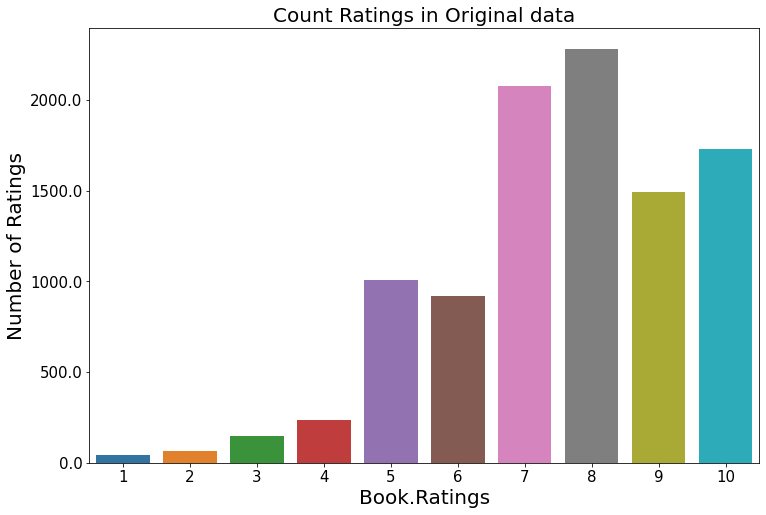

In [53]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="Book.Rating", data=book)
ax.set_yticklabels([num for num in ax.get_yticks()])

plt.tick_params(labelsize = 15)
plt.title("Count Ratings in Original data", fontsize = 20)
plt.xlabel("Book.Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

<ipython-input-54-e45d3b012c58>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([num for num in ax.get_yticks()])


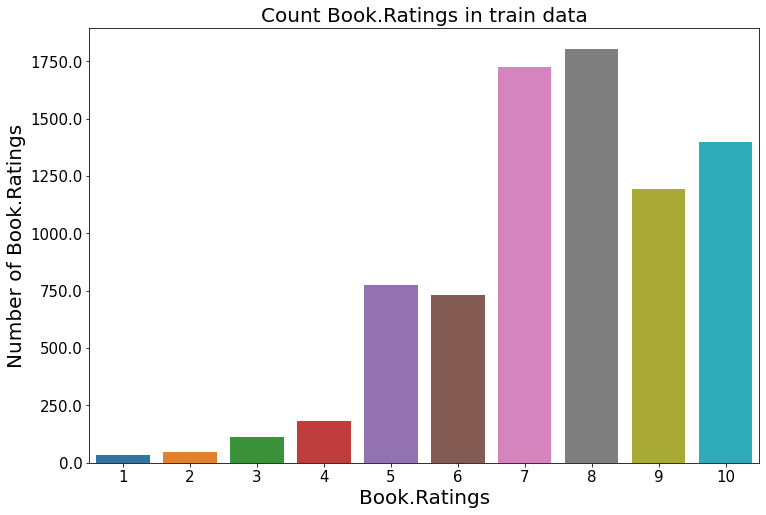

In [54]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="Book.Rating", data=train_data)
ax.set_yticklabels([num for num in ax.get_yticks()])

plt.tick_params(labelsize = 15)
plt.title("Count Book.Ratings in train data", fontsize = 20)
plt.xlabel("Book.Ratings", fontsize = 20)
plt.ylabel("Number of Book.Ratings", fontsize = 20)
plt.show()

In [55]:
def get_user_item_sparse_matrix(df):
    sparse_data = sparse.csr_matrix((df[:,1], (df[:,3], df[:,2])))
    return sparse_data

In [56]:
def get_book_recommendations(Title,topN):
      #topN = 10
    # Getting the book index using its title 
    book_id = book_index[Title]
    # Getting the pair wise similarity score for all the book's 
    #print(book_id)
    cosine_scores = list(enumerate(cos_sim_matrix[book_id]))  
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores,key=lambda x:x[1],reverse = True)
    #print(cosine_scores)
    # Get the scores of top 10 most similar books
    cosine_scores_10 = cosine_scores[0:topN+1] 
    #print(cosine_scores_10)
    # Getting the book index 
    book_idx  =  [i[0] for i in cosine_scores_10]
    rat_scores =  [i[1] for i in cosine_scores_10]
    # Similar book and scores
    similar_books = pd.DataFrame(columns=["Book.Title","Book.Rating"])
    similar_books["Book.Title"] = book.loc[book_idx,"Book.Title"]
    similar_books["Book.Rating"] = rat_scores
    print (similar_books)
    similar_books.reset_index(inplace=True)  
    similar_books.drop(["Book.Title"],axis=1,inplace=True)
    #print (similar_books)
    

In [57]:
get_book_recommendations('Decision in Normandy',topN=2)

                                             Book.Title  Book.Rating
2                                  Decision in Normandy     1.000000
3560          Currahee!:  A Screaming Eagle at Normandy     0.318337
3559  If You Survive: From Normandy to the Battle of...     0.209653


In [58]:
get_book_recommendations('Kids Say the Darndest Things',topN=5)

                                             Book.Title  Book.Rating
9999                       Kids Say the Darndest Things     1.000000
8717                               Before I Say Goodbye     0.319959
8865                                     Say No to Joe?     0.319959
2321                          How to Say It Style Guide     0.293177
136                               Before I Say Good-Bye     0.272421
5474  Everything Cat: What Kids Really Want to Know ...     0.267615


In [59]:
get_book_recommendations('Before I Say Good-Bye',topN=20)

                                             Book.Title  Book.Rating
136                               Before I Say Good-Bye     1.000000
1679                    Before I Say Good-Bye : A Novel     0.955136
1456  Bye, Bye, Butterfree (Pokemon Adventure (Golde...     0.478495
2544                                     How to Be Good     0.467538
7846                                  When She Was Good     0.467538
9140                                            So Good     0.467538
8717                               Before I Say Goodbye     0.377568
8865                                     Say No to Joe?     0.377568
9748                                      The Good Life     0.365183
2321                          How to Say It Style Guide     0.345964
3720                                Too Good to Be True     0.333519
8175                   You Can't Keep a Good Woman Down     0.333119
2944                                         GOOD EARTH     0.323719
6986                              

In [60]:
book.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [61]:
user_book_rating = book.pivot_table(columns='Book.Title', values='Book.Rating')

In [62]:
user_book_rating

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
Book.Rating,8.0,6.0,4.0,7.0,8.0,7.0,10.0,10.0,7.0,10.0,...,8.0,9.0,10.0,7.0,8.0,8.0,9.0,7.0,5.0,4.0


In [63]:
gump_ratings = user_book_rating['Good in Bed']

In [64]:
gump_ratings.head()

Book.Rating    7.0
Name: Good in Bed, dtype: float64

In [65]:
books_like_gump = user_book_rating.corrwith(gump_ratings)
corr_gump = pd.DataFrame(books_like_gump, columns=['Correlation'])
corr_gump.dropna(inplace=True)
corr_gump.head()

D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
Book.Title,


In [66]:
corr_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
Book.Title,


In [67]:
corr_gump_mean = corr_gump.join(ratings['num of ratings'])
corr_gump_mean.head()

,Correlation,num of ratings
Book.Title,,


In [68]:
corr_gump_mean[corr_gump_mean ['num of ratings']>50].sort_values('Correlation', ascending=False).head()

,Correlation,num of ratings
Book.Title,,
